# Successful NFL Players in Modern Schemes
###### By Tommy Evans-Barton, Mediocre Data Scientist and Diehard Packers Fan

## Introduction

This year, the Green Bay Packers are in the unfamiliar position of having a new head coach, Matt LaFleur, and with him, an entirely new offense predicated on the "illusion of complexity" and the zone running scheme. While we could go on and on analyzing this scheme, a lot of people have already done this (I particularly like __[this](http://www.packtothefuture.com/articles/xs-and-os-lafleurs-pass-game-in-week-2/)__ series of breakdowns by *Pack to the Future's* Ben Clubb), and while I might throw my hat in the ring too, for now I wanted to try to do something a little bit different.


It's no secret that there have been some issues with the skill positions (Wide Receivers, Tight Ends, and Running Backs) in the past few seasons for the Packers. For Wide Receivers, it's a case of injuries and inexperience, with rookies playing heavy snap percentages on offense (data courtesy of __[Football Outsiders](https://www.footballoutsiders.com/stats/snapcounts)__):

| Rookie | Offensive Snap Percentage|
|---|---|
| M. Valdes-Scantling | 64.4% |
| E. St. Brown | 33.3% |
| J. Moore | 6.9% |
| J. Kumerow | 12.7% |


due to injuries to Randall Cobb and Geronimo Allison. For the Tight End room, Jimmy Graham and Marcedes Lewis have been hit hard by father time, and Lance Kendricks, in my dad's words, is a J.A.G (Just A Guy). Running backs have also felt the sting of injury (with Aaron Jones having the second knee injury of his NFL career in as many years), but overall youth coupled with the borderline *criminal* misusage of this position group last year causes me to withhold most of my criticisms, at least for another season.


However, all of this is to say that the skill players could use an upgrade, or at the very least some reenforcements. But who will fit this new coach's schemes? Who can answer the call? That's what we hope to find out, so don't touch that dial.


In terms of success running this scheme, no two coaches have shown more promise than the Los Angeles Rams's Sean McVay and the San Francisco 49ers's Kyle Shanahan, LaFleur's two coaching mentors. Given the relative success of these two schemes (yes I know the 49ers went 4-12, but considering they were starting Nick Mullens, I'll cut Shanahan some slack), it seems reasonable to assume that LaFleur's scheme will run best with players like those that play well in L.A. and S.F., and that these are the types of players he will be telling Gutekuns to add in the draft. So the question is, who are these players?


In this analysis, we're going to go in depth on the position players from the Rams and 49ers that have helped catapult this new-age scheme into popularity, and determine which players have been good 'schematic fits', i.e. find who has succeeded in this scheme. From this, we're going to treat these players as prototypes, classify them as 'successful' and then use Logistic Regression and Support Vector Machines in order to predict which other players in the NFL may be successful.

In [279]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
import SkillPlayerFunctions as spf

In [395]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats import linregress
from scipy.stats import percentileofscore
import os
from copy import deepcopy
from sklearn.linear_model import LogisticRegression
from sklearn import svm

***

## A Note on Coding, and Some Terms to Know

I know a lot of people who may be reading this just looked at the cell above and said "Uh-uh this ain't it chief," or "Well that's the second nerdiest thing I've ever seen" and to be honest the latter is spot on. I'm doing this analysis in the only way I know how, with coding and statistics, but I know a lot of people reading this won't have a very strong background in either, and may find a lot of the code hard to follow or even intimidating. However, I want to do my best to make this breakdown cater to everyone: from the stats nerds (like me), to the arm-chair GM's (also me), all the way to the casual fans who tune in every other week. That means I'll be doing my best to explain:

1. Why I decided to do what I did when it comes to the data, and why I decided to use the data I chose
2. What the purpose of each function I wrote and step I took was
3. How the code aims to accomplish these steps (where an explanation is easy)
4. What the statistical conclusions mean

and anything else that may come up along the way.

There are, however, some terms I may use casually that you might want to familiarize yourself with, such as:

- **Cell** - what you're reading this in right now! It can either be filled with text, like this one, or with code, like the one above.

- **Function** - essentially a section of code that will give you a value or values at the end. What this value is (a number vs. a group of numbers vs. a word) depends on the function, and can really be almost anything. If you see something in the form `spf.<>` in one of the code blocks, it's a function I have written that you can find in the SkillPlayerFunctions.py file.

- **Null/NaN(Not a Number)** - this means exactly what you think it means: Nothing. This happens in a data set when there's just nothing put in. It can either happen on purpose (i.e. if a receiver didn't play any games, their receiving yards might be `Null/NaN`, as there is no value entered for them) or on accident (i.e. someone forgot to put a piece of data in). The second of these is unlikely in our dataset, but just keep in mind that it CAN happen.

- **DataFrame** - whenever I say this, you can pretty much replace it with the word 'table'. They're basically the same thing, a DataFrame is just the coding word for this specific type of table.

- **Map** - when we take one value and replace it with another one. You're original value is often called a 'key' and what it maps to is the 'value'. So something like {'a' : 1 } means that the letter 'a' is 'mapped' to the value 1, i.e. that 'a' will be replaced with 1.

- **Comments** - When you see a line in a code cell with a hashtag in front of it (`#<...>`) this is just a comment that I've included to tell you something about how the code in that cell is working/what it is doing.


Overall, however, the moral of the story is: try not to get too worried about the code or the tables, because you'll be able to understand everything in here without it. On the other hand, if you ARE the type of person who's a statistics/data science nerd, and DOES want to look at the code, I've attached it all in a .py file in this directory.


Also, any feedback is more than welcome; I know this writeup isn't perfect, but I'm trying to improve my writing as much as anyone, and I can't do that without knowing what's wrong with it. So if a step I took is unclear, or you want more clarification on a decision I made, or if you even feel like some of the conclusions or assumptions I made are just wrong, let me know. Questions, comments, concerns, I want all of it, so hit me up.


Now, with all of that out of the way, let's get down to it and see how this all plays out!

***

## The Data

Our NFL data is going to come from a mix of places, but mostly from __[Pro Football Reference](https://www.pro-football-reference.com/)__, so a huge shoutout to them for having a good source to draw from. 
### Original NFL Player Data
What we're going to do first is get a list of the players by looking at the 49ers' and Rams' rosters. I've loaded in the 2017 and 2018 rosters below for each team below.

In [282]:
sf_2018_roster = pd.read_csv('data/49ersRoster.csv') #The complete San Francisco 49ers 2018 Roster
rams_2018_roster = pd.read_csv('data/RamsRoster.csv') #The complete Los Angeles Rams 2018 Roster
sf_2017_roster = pd.read_csv('data/49ers2017Roster.csv') #49ers 2017 Roster
rams_2017_roster = pd.read_csv('data/Rams2017Roster.csv') #Rams 2017 Roster

Next I combined the two years for each team into one table per team. Below you can see what they look like before we clean them up.

In [283]:
sf_full_roster = pd.concat([sf_2018_roster, sf_2017_roster]) #The whole San Francisco Roster
rams_full_roster = pd.concat([rams_2018_roster, rams_2017_roster]) #The whole Rams Roster

In [284]:
sf_full_roster.head()

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,4.0,Nick Mullens\MullNi00,23.0,QB,8,8.0,210.0,6-1,Southern Miss,3/21/1995,Rook,6.0,NaN,$129200
1,10.0,Jimmy Garoppolo\GaroJi00,27.0,qb,3,3.0,225.0,6-2,East. Illinois,11/2/1991,4,2.0,New England Patriots / 2nd / 62nd pick / 2014,$6200000
2,3.0,C.J. Beathard\BeatC.00,25.0,qb,6,5.0,215.0,6-2,Iowa,11/16/1993,1,3.0,San Francisco 49ers / 3rd / 104th pick / 2017,$625393
3,41.0,Jeff Wilson\WilsJe01,23.0,rb,6,2.0,194.0,6-0,NaN,11/16/1995,Rook,2.0,NaN,$129200
4,36.0,Alfred Morris\MorrAl00,30.0,rb,12,1.0,224.0,5-10,Florida Atlantic,12/12/1988,6,3.0,Washington Redskins / 6th / 173rd pick / 2012,$790000


In [285]:
rams_full_roster.head()

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,8.0,Brandon Allen\AlleBr00,26.0,NaN,1,0.0,209.0,6-2,Arkansas,9/5/1992,Rook,0.0,Jacksonville Jaguars / 6th / 201st pick / 2016,$630000
1,55.0,Brian Allen\AlleBr02,23.0,NaN,12,0.0,303.0,6-2,Michigan St.,10/11/1995,Rook,1.0,Los Angeles Rams / 4th / 111th pick / 2018,$480000
2,35.0,C.J. Anderson\AndeC.00,27.0,rb,2,2.0,225.0,5-8,California,2/10/1991,5,2.0,NaN,$92941
3,26.0,Mark Barron\BarrMa00,29.0,LB,12,12.0,230.0,6-2,Alabama,10/27/1989,6,5.0,Tampa Bay Buccaneers / 1st / 7th pick / 2012,$6499999
4,66.0,Austin Blythe\BlytAu00,26.0,RG,16,16.0,298.0,6-3,Iowa,6/16/1992,2,10.0,Indianapolis Colts / 7th / 248th pick / 2016,$630000


### Cleaning the Original Player Data

Unfortunately, as is often the case, our data is neither complete nor perfect, and there's a lot of work to be done on it before we can use it to make any conclusions or do any analysis. To be honest, unless you're extremely interested in the nitty-gritty of data science, I recommend you skip through this part (ahead to [Players to Use as Prototypes](#Players-to-Use-as-Prototypes)), because preprocessing data is a little annoying, even more boring, and overall doesn't need to be fully read through to understand the analysis at the end.


Still here huh? Well alright, you've been warned. As we said before, we only care about the skill positions, but this data has every player. What we're going to do first is clean up the position data and filter out players we don't care about. We'll do this with the function `clean_position` from our .py file that will:

1. Get rid of players that either don't have a position listed, or have a position that's not WR, TE, or RB.
2. Uniformly format the position column (in this case just making them all capitalized) so that the data is easier to work with.

In [286]:
sf_skill_positions = spf.clean_position(sf_full_roster)
rams_skill_positions = spf.clean_position(rams_full_roster)

In [287]:
sf_skill_positions.head()

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,41.0,Jeff Wilson\WilsJe01,23.0,RB,6,2.0,194.0,6-0,NaN,11/16/1995,Rook,2.0,NaN,$129200
1,36.0,Alfred Morris\MorrAl00,30.0,RB,12,1.0,224.0,5-10,Florida Atlantic,12/12/1988,6,3.0,Washington Redskins / 6th / 173rd pick / 2012,$790000
2,22.0,Matt Breida\BreiMa00,23.0,RB,14,13.0,190.0,5-10,Georgia Southern,2/28/1995,1,6.0,NaN,$555000
3,18.0,Dante Pettis\PettDa00,23.0,WR,12,7.0,195.0,6-1,Washington,10/23/1995,Rook,3.0,San Francisco 49ers / 2nd / 44th pick / 2018,$480000
4,13.0,Richie James\JameRi00,23.0,WR,13,2.0,185.0,5-9,Middle Tenn. St.,9/5/1995,Rook,2.0,San Francisco 49ers / 7th / 240th pick / 2018,$480000


In [288]:
rams_skill_positions.head()

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,35.0,C.J. Anderson\AndeC.00,27.0,RB,2,2.0,225.0,5-8,California,2/10/1991,5,2.0,NaN,$92941
1,12.0,Brandin Cooks\CookBr00,25.0,WR,16,16.0,183.0,5-10,Oregon St.,9/25/1993,4,13.0,New Orleans Saints / 1st / 20th pick / 2014,$4000000
2,30.0,Todd Gurley*+\GurlTo01,24.0,RB,14,14.0,224.0,6-1,Georgia,8/3/1994,3,16.0,St. Louis Rams / 1st / 10th pick / 2015,$950000
3,89.0,Tyler Higbee\HigbTy00,25.0,TE,16,16.0,255.0,6-6,Western Kentucky,1/1/1993,2,3.0,Los Angeles Rams / 4th / 110th pick / 2016,$630000
4,18.0,Cooper Kupp\KuppCo00,25.0,WR,8,8.0,208.0,6-2,East. Washington,6/15/1993,1,6.0,Los Angeles Rams / 3rd / 69th pick / 2017,$640000


So now we've cleaned this data a little bit, but we can still see we have a few problems with it, namely:


1. We have columns we don't care about. We care about the player, their traits, their stats, their college and when they were drafted (because this will help us find some more information on them later), and that's about it. We're going to get rid of all the other extra stuff.

2. If you look at the player entries, there's a whole bunch of nonsense after they're names because of the way the data was originally formatted. We want to get rid of this, not only to make it look prettier, but also to make it easier to use.

3. We have duplicate entries for players who played in both 2017 and 2018 for their respective teams. We'll get rid of the second entry (in this case, arbitrarily the entry for 2017).

To do the first one, we'll write a quick function (`drop_unnecessary_columns_rosters`) to get rid of the columns we don't want and run each DataFrame through it:

In [289]:
sf_skill_positions = spf.drop_unnecessary_columns_rosters(sf_skill_positions)
rams_skill_positions = spf.drop_unnecessary_columns_rosters(rams_skill_positions)

For the second and third issues, we'll have to write a (slightly more complicated) function (`clean_player_column`), and run IT on each DataFrame:

In [290]:
sf_skill_positions = spf.clean_player_column(sf_skill_positions)
rams_skill_positions = spf.clean_player_column(rams_skill_positions)

And now we can see that we have two cleaned and accurate tables without duplicates.

In [291]:
sf_skill_positions.head()

,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,Drafted (tm/rnd/yr)
0,Jeff Wilson,23.0,RB,6,2.0,194.0,6-0,NaN,NaN
1,Alfred Morris,30.0,RB,12,1.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012
2,Matt Breida,23.0,RB,14,13.0,190.0,5-10,Georgia Southern,NaN
3,Dante Pettis,23.0,WR,12,7.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018
4,Richie James,23.0,WR,13,2.0,185.0,5-9,Middle Tenn. St.,San Francisco 49ers / 7th / 240th pick / 2018


In [292]:
rams_skill_positions.head()

,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,Drafted (tm/rnd/yr)
0,C.J. Anderson,27.0,RB,2,2.0,225.0,5-8,California,NaN
1,Brandin Cooks,25.0,WR,16,16.0,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014
2,Todd Gurley,24.0,RB,14,14.0,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015
3,Tyler Higbee,25.0,TE,16,16.0,255.0,6-6,Western Kentucky,Los Angeles Rams / 4th / 110th pick / 2016
4,Cooper Kupp,25.0,WR,8,8.0,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017


### NFL Statistics

We've made some progress, but we want statistics to go along with these players, or else this information isn't all that useful, so we're going to have to go get more data. For our purposes we'll be using 2017 and 2018 because these are the years that McVay and Shanahan were head coaches for their respective teams, and we only care if the player is successful in these specific schemes.

In [293]:
rams_stats_2018 = pd.read_csv('data/RamsRecAndRush2018.csv', skiprows = [0])
rams_stats_2017 = pd.read_csv('data/RamsRecAndRush2017.csv', skiprows = [0])
sf_stats_2018 = pd.read_csv('data/49ersRecAndRush2018.csv', skiprows = [0])
sf_stats_2017 = pd.read_csv('data/49ersRecAndRush2017.csv', skiprows = [0])

In [294]:
rams_stats_2018.head()

,No.,Player,Age,Pos,G,GS,Att,Yds,TD,Lng,...,TD.1,Lng.1,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,30.0,Todd Gurley*+\GurlTo01,24.0,RB,14,14.0,256,1251,17,36.0,...,4.0,56.0,4.2,41.4,72.8%,315.0,5.8,1831,21,1
1,34.0,Malcolm Brown\BrowMa03,25.0,NaN,12,0.0,43,212,0,19.0,...,1.0,18.0,0.4,4.3,71.4%,48.0,5.5,264,1,0
2,35.0,C.J. Anderson\AndeC.00,27.0,rb,2,2.0,43,299,2,46.0,...,0.0,13.0,2.0,8.5,66.7%,47.0,6.7,316,2,0
3,16.0,Jared Goff*\GoffJa00,24.0,QB,16,16.0,43,108,2,16.0,...,NaN,NaN,NaN,NaN,NaN,43.0,2.5,108,2,12
4,42.0,John Kelly\KellJo00,22.0,NaN,4,0.0,27,74,0,7.0,...,0.0,18.0,0.5,6.8,66.7%,29.0,3.5,101,0,0


### Cleaning NFL Statistics

The data loaded in above is the stats for the Rams and 49ers for 2017 and 2018, but it needs to get worked on a little bit before we can combine it with our other data.

First, the column names don't exactly make it clear as to what the values are, so we'll rename them (`fix_column_names`) by looking at the original data (what we're doing here is making sure we can easily tell what are rushing numbers and what are receiving numbers before we get too deep in).

In [295]:
rams_stats_2018 = spf.fix_column_names(rams_stats_2018)
rams_stats_2017 = spf.fix_column_names(rams_stats_2017)
sf_stats_2018 = spf.fix_column_names(sf_stats_2018)
sf_stats_2017 = spf.fix_column_names(sf_stats_2017)

In [296]:
sf_stats_2018.head()

,No.,Player,Age,Pos,G,GS,Rush Att,Rush Yds,Rush TD,Rush Lng,...,Receiving TD,Receiving Lng,R/G,Receiving Y/G,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,22.0,Matt Breida\BreiMa00,23.0,RB,14,13.0,153,814,3,66.0,...,2.0,26.0,1.9,18.6,87.1%,180.0,6.0,1075,5,1
1,36.0,Alfred Morris\MorrAl00,30.0,rb,12,1.0,111,428,2,51.0,...,0.0,16.0,0.7,6.1,61.5%,119.0,4.2,501,2,2
2,41.0,Jeff Wilson\WilsJe01,23.0,rb,6,2.0,66,266,0,18.0,...,0.0,24.0,2.0,16.3,80.0%,78.0,4.7,364,0,3
3,31.0,Raheem Mostert\MostRa00,26.0,NaN,9,0.0,34,261,1,52.0,...,0.0,23.0,0.7,2.8,85.7%,40.0,7.2,286,1,1
4,3.0,C.J. Beathard\BeatC.00,25.0,qb,6,5.0,19,69,1,13.0,...,NaN,NaN,NaN,NaN,NaN,19.0,3.6,69,1,5


We also have the same issue with the player names that we had before, but thankfully we can just use our function from the previous part to do this too.

In [297]:
rams_stats_2018 = spf.clean_player_column(rams_stats_2018)
rams_stats_2017 = spf.clean_player_column(rams_stats_2017)
sf_stats_2018 = spf.clean_player_column(sf_stats_2018)
sf_stats_2017 = spf.clean_player_column(sf_stats_2017)

In [337]:
rams_stats_2018.head()

,No.,Player,Age,Pos,G,GS,Rush Att,Rush Yds,Rush TD,Rush Lng,...,Receiving TD,Receiving Lng,R/G,Receiving Y/G,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,30.0,Todd Gurley,24.0,RB,14,14.0,256,1251,17,36.0,...,4.0,56.0,4.2,41.4,72.8%,315.0,5.8,1831,21,1
1,34.0,Malcolm Brown,25.0,0,12,0.0,43,212,0,19.0,...,1.0,18.0,0.4,4.3,71.4%,48.0,5.5,264,1,0
2,35.0,C.J. Anderson,27.0,rb,2,2.0,43,299,2,46.0,...,0.0,13.0,2.0,8.5,66.7%,47.0,6.7,316,2,0
3,16.0,Jared Goff,24.0,QB,16,16.0,43,108,2,16.0,...,0.0,0.0,0.0,0.0,0,43.0,2.5,108,2,12
4,42.0,John Kelly,22.0,0,4,0.0,27,74,0,7.0,...,0.0,18.0,0.5,6.8,66.7%,29.0,3.5,101,0,0


Now, since we have two years worth of stats, we want to find a good way to combine these two seasons into a single feature. In this analysis, I have decided that it's probably best to go on a per game basis for attempts, receptions, touchdowns, and yards as well as a per reception/per attempt for yards, as I believe this will limit the affect that missing games will have, and with two years (a maximum of 32 games) as our sample size, this should mitigate the risk of having a few small or big games (looking at you Derrick Henrys of the world) greatly affect our data. Also, we'll adjust catch percentage to account for the two year span.

Before combining, however, we're going to replace all missing values in these DataFrames with zero, as after looking at the data, this seems to be what's called a `Null` that is `Missing by Design`, or that the `NaN` in this case just refers to 0 targets/receptions/etc.

In [299]:
rams_stats_2018 = rams_stats_2018.fillna(0) #fills NaN/null values with 0
rams_stats_2017 = rams_stats_2017.fillna(0)
sf_stats_2018 = sf_stats_2018.fillna(0)
sf_stats_2017 = sf_stats_2017.fillna(0)

And now we can combine the stats for 2017 and 2018 with `merge_stats_cols`:

In [300]:
rams_stats = spf.merge_stats_cols(rams_stats_2017, rams_stats_2018)
sf_stats = spf.merge_stats_cols(sf_stats_2017, sf_stats_2018)

In [352]:
rams_for_later = deepcopy(rams_stats)
rams_stats.head()

,Player,G,GS,Rush Att,Rush Yds,Rush TD,Tgt,Rec,Receiving Yds,Receiving TD,Touch,Catch Percentage
0,Todd Gurley,29.0,29.0,535.0,2556.0,30.0,168.0,123.0,1368.0,10.0,658.0,0.732143
1,Malcolm Brown,23.0,1.0,106.0,458.0,1.0,18.0,14.0,105.0,1.0,120.0,0.777778
2,Tavon Austin,16.0,9.0,59.0,270.0,1.0,22.0,13.0,47.0,0.0,72.0,0.590909
3,Jared Goff,31.0,31.0,71.0,159.0,3.0,0.0,0.0,0.0,0.0,71.0,NaN
4,Lance Dunbar,4.0,0.0,11.0,51.0,1.0,3.0,1.0,1.0,0.0,12.0,0.333333


In [353]:
sf_for_later = deepcopy(sf_stats)
sf_stats.head()

,Player,G,GS,Rush Att,Rush Yds,Rush TD,Tgt,Rec,Receiving Yds,Receiving TD,Touch,Catch Percentage
0,Carlos Hyde,16.0,16.0,240.0,938.0,8.0,88.0,59.0,350.0,0.0,299.0,0.670455
1,Matt Breida,30.0,13.0,258.0,1279.0,5.0,67.0,48.0,441.0,3.0,306.0,0.716418
2,C.J. Beathard,13.0,10.0,45.0,205.0,4.0,0.0,0.0,0.0,0.0,45.0,NaN
3,Jimmy Garoppolo,9.0,8.0,23.0,44.0,1.0,1.0,1.0,-6.0,0.0,24.0,1.000000
4,Kyle Juszczyk,30.0,24.0,15.0,61.0,0.0,83.0,63.0,639.0,2.0,78.0,0.759036


So we've been able to combine each team's years together, and now the easy part, normalizing the data based on games and attempts.

In [303]:
rams_stats_normalized = spf.normalize_stats(rams_stats)
sf_stats_normalized = spf.normalize_stats(sf_stats)

In [304]:
rams_stats_normalized.head()

,Player,G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Todd Gurley,29.0,29.0,0.732143,22.689655,1.034483,18.448276,4.777570,88.137931,5.793103,4.241379,11.121951,47.172414,0.344828
1,Malcolm Brown,23.0,1.0,0.777778,5.217391,0.043478,4.608696,4.320755,19.913043,0.782609,0.608696,7.500000,4.565217,0.043478
2,Tavon Austin,16.0,9.0,0.590909,4.500000,0.062500,3.687500,4.576271,16.875000,1.375000,0.812500,3.615385,2.937500,0.000000
3,Jared Goff,31.0,31.0,NaN,2.290323,0.096774,2.290323,2.239437,5.129032,0.000000,0.000000,NaN,0.000000,0.000000
4,Lance Dunbar,4.0,0.0,0.333333,3.000000,0.250000,2.750000,4.636364,12.750000,0.750000,0.250000,1.000000,0.250000,0.000000


In [305]:
sf_stats_normalized.head()

,Player,G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Carlos Hyde,16.0,16.0,0.670455,18.687500,0.500000,15.000000,3.908333,58.625000,5.500000,3.687500,5.932203,21.875000,0.000000
1,Matt Breida,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
2,C.J. Beathard,13.0,10.0,NaN,3.461538,0.307692,3.461538,4.555556,15.769231,0.000000,0.000000,NaN,0.000000,0.000000
3,Jimmy Garoppolo,9.0,8.0,1.000000,2.666667,0.111111,2.555556,1.913043,4.888889,0.111111,0.111111,-6.000000,-0.666667,0.000000
4,Kyle Juszczyk,30.0,24.0,0.759036,2.600000,0.000000,0.500000,4.066667,2.033333,2.766667,2.100000,10.142857,21.300000,0.066667


### Combining Roster Data and Statistic Data

Now we'll combine our roster data and our statistics data so that we can use it to determine the type of player we should be looking for.

In [306]:
sf_players = spf.merge_in_stats(sf_stats_normalized, sf_skill_positions)
rams_players = spf.merge_in_stats(rams_stats_normalized, rams_skill_positions)

In [307]:
rams_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,C.J. Anderson,27.0,RB,225.0,5-8,California,NaN,2.0,2.0,0.666667,23.500000,1.000000,21.500000,6.953488,149.500000,3.000000,2.000000,4.250000,8.500000,0.000000
1,Brandin Cooks,25.0,WR,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014,16.0,16.0,0.683761,5.625000,0.062500,0.625000,6.800000,4.250000,7.312500,5.000000,15.050000,75.250000,0.312500
2,Todd Gurley,24.0,RB,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015,29.0,29.0,0.732143,22.689655,1.034483,18.448276,4.777570,88.137931,5.793103,4.241379,11.121951,47.172414,0.344828
3,Tyler Higbee,25.0,TE,255.0,6-6,Western Kentucky,Los Angeles Rams / 4th / 110th pick / 2016,32.0,32.0,0.620253,1.531250,0.000000,0.000000,NaN,0.000000,2.468750,1.531250,11.979592,18.343750,0.093750
4,Cooper Kupp,25.0,WR,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017,23.0,14.0,0.684564,4.608696,0.000000,0.173913,6.250000,1.086957,6.478261,4.434783,14.068627,62.391304,0.478261
5,Josh Reynolds,23.0,WR,196.0,6-3,Texas A&M,Los Angeles Rams / 4th / 117th pick / 2017,32.0,9.0,0.519481,1.312500,0.000000,0.062500,4.000000,0.250000,2.406250,1.250000,12.650000,15.812500,0.187500
6,Robert Woods,26.0,WR,195.0,6-0,USC,Buffalo Bills / 2nd / 41st pick / 2013,28.0,27.0,0.660465,5.821429,0.035714,0.750000,8.047619,6.035714,7.678571,5.071429,14.084507,71.428571,0.392857
7,Tavon Austin,27.0,WR,179.0,5-8,West Virginia,St. Louis Rams / 1st / 8th pick / 2013,16.0,9.0,0.590909,4.500000,0.062500,3.687500,4.576271,16.875000,1.375000,0.812500,3.615385,2.937500,0.000000
8,Malcolm Brown,24.0,RB,222.0,5-11,Texas,NaN,23.0,1.0,0.777778,5.217391,0.043478,4.608696,4.320755,19.913043,0.782609,0.608696,7.500000,4.565217,0.043478
9,Derek Carrier,27.0,TE,244.0,6-4,Beloit,NaN,14.0,3.0,0.727273,0.571429,0.000000,0.000000,NaN,0.000000,0.785714,0.571429,8.875000,5.071429,0.000000


In [308]:
sf_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Jeff Wilson,23.0,RB,194.0,6-0,NaN,NaN,6.0,2.0,0.800000,13.000000,0.000000,11.000000,4.030303,44.333333,2.500000,2.000000,8.166667,16.333333,0.000000
1,Alfred Morris,30.0,RB,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,0.615385,9.916667,0.166667,9.250000,3.855856,35.666667,1.083333,0.666667,9.125000,6.083333,0.000000
2,Matt Breida,23.0,RB,190.0,5-10,Georgia Southern,NaN,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
3,Dante Pettis,23.0,WR,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,0.600000,2.333333,0.000000,0.083333,-2.000000,-0.166667,3.750000,2.250000,17.296296,38.916667,0.416667
4,Richie James,23.0,WR,185.0,5-9,Middle Tenn. St.,San Francisco 49ers / 7th / 240th pick / 2018,13.0,2.0,0.642857,0.692308,0.000000,0.000000,NaN,0.000000,1.076923,0.692308,14.444444,10.000000,0.076923
5,Marquise Goodwin,28.0,WR,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,0.533784,3.222222,0.000000,0.296296,6.625000,1.962963,5.481481,2.925926,17.177215,50.259259,0.222222
6,Pierre Garcon,32.0,WR,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,0.566372,4.000000,0.000000,0.000000,NaN,0.000000,7.062500,4.000000,12.281250,49.125000,0.062500
7,Kendrick Bourne,23.0,WR,203.0,6-1,East. Washington,NaN,27.0,8.0,0.580000,2.148148,0.000000,0.000000,NaN,0.000000,3.703704,2.148148,12.827586,27.555556,0.148148
8,George Kittle,25.0,TE,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,0.658291,4.258065,0.000000,0.032258,10.000000,0.322581,6.419355,4.225806,14.442748,61.032258,0.225806
9,Garrett Celek,30.0,TE,252.0,6-5,Michigan St.,NaN,31.0,14.0,0.634146,0.838710,0.000000,0.000000,NaN,0.000000,1.322581,0.838710,16.384615,13.741935,0.193548


***

## Determining Good Scheme Fits
### Cuts Based on Small Sample Size/Low Usage

Now that we have merged our data, we can make a first round of removals based on small sample size and low usage. We defined low usage with a threshold of being active for at least 10 games as well as a threshold for receivers and tight ends of starting at least 25% of games, and for running backs of getting at least 6 touches a game. Usage numbers are very important when considering good players for these schemes, as a lack of usage demonstrates a lack of talent and or a lack of confidence from the coaching staff, who know better than anyone what works and what doesn't in their offense.

Unfortunately, it is with a heavy heart that we must say fairwell to `C.J. Anderson` (I can here the voice saying "you've been voted off the island" as I type). Yes, he had a good run at the end of the season. Yes he almost single handedly made an MVP ride the bench, for some reason (Todd Gurley missing flyers are still up all over the city of L.A.). And ultimately he did play well for the Rams. But 2 games is simply not a big enough sample size to draw any conclusions on whether or not he is a type of player that works in this system, so it's goodbye to everyone's favorite bowling ball.

As for low usage on the Rams, it is also fair to cut `Malcolm Brown` (only 5.2 touches per game), `Derek Carrier` (only started 3 of 14 games), `Pharoh Cooper` (only started 1 of 16 games), `Gerald Everett` (only started 2 of 32 games) and `Mike Thomas` (only active for 8 games) (and no not THAT Mike Thomas). An additional indication of these players' low usage is that all of the receivers averaged less than 2 touches a game and none had more than 3 starts.


For the 49ers' players, the cuts are a little less painful. First, we can certainly remove `Logan Paulsen` as he had no receiving or rushing statistics while on the 49ers (don't worry I double checked). We can also remove `Richie James` (only started 2 of 13 games), `Jeff Wilson` (only active for 6 games), `Aldrick Robinson` (only started 1 of 16 games), `Louis Murphy` (only active for 7 games), and `Trent Taylor` (only started 1 of 29 games). 

In [309]:
rams_players = rams_players[~(rams_players['Player'].isin(['C.J. Anderson', 'Malcolm Brown', 'Derek Carrier', 'Pharoh Cooper', 'Gerald Everett', 'Mike Thomas']))].reset_index(drop = True)
sf_players = sf_players[~(sf_players['Player'].isin(['Logan Paulsen', 'Richie James', 'Jeff Wilson', 'Aldrick Robinson', 'Trent Taylor', 'Louis Murphy']))].reset_index(drop = True)

In order to make further conclusions on 'successfulness' and 'fit' beyond this, however, we're going to need to go deeper into thes statistics and deeper player by player. We'll start with the 49ers.

In [310]:
rams_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Brandin Cooks,25.0,WR,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014,16.0,16.0,0.683761,5.625000,0.062500,0.625000,6.800000,4.250000,7.312500,5.000000,15.050000,75.250000,0.312500
1,Todd Gurley,24.0,RB,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015,29.0,29.0,0.732143,22.689655,1.034483,18.448276,4.777570,88.137931,5.793103,4.241379,11.121951,47.172414,0.344828
2,Tyler Higbee,25.0,TE,255.0,6-6,Western Kentucky,Los Angeles Rams / 4th / 110th pick / 2016,32.0,32.0,0.620253,1.531250,0.000000,0.000000,NaN,0.000000,2.468750,1.531250,11.979592,18.343750,0.093750
3,Cooper Kupp,25.0,WR,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017,23.0,14.0,0.684564,4.608696,0.000000,0.173913,6.250000,1.086957,6.478261,4.434783,14.068627,62.391304,0.478261
4,Josh Reynolds,23.0,WR,196.0,6-3,Texas A&M,Los Angeles Rams / 4th / 117th pick / 2017,32.0,9.0,0.519481,1.312500,0.000000,0.062500,4.000000,0.250000,2.406250,1.250000,12.650000,15.812500,0.187500
5,Robert Woods,26.0,WR,195.0,6-0,USC,Buffalo Bills / 2nd / 41st pick / 2013,28.0,27.0,0.660465,5.821429,0.035714,0.750000,8.047619,6.035714,7.678571,5.071429,14.084507,71.428571,0.392857
6,Tavon Austin,27.0,WR,179.0,5-8,West Virginia,St. Louis Rams / 1st / 8th pick / 2013,16.0,9.0,0.590909,4.500000,0.062500,3.687500,4.576271,16.875000,1.375000,0.812500,3.615385,2.937500,0.000000
7,Sammy Watkins,24.0,WR,211.0,6-1,Clemson,Buffalo Bills / 1st / 4th pick / 2014,15.0,14.0,0.557143,2.600000,0.000000,0.000000,NaN,0.000000,4.666667,2.600000,15.205128,39.533333,0.533333


### Cuts Based on Negative Usage Trends

There is also a case of players who, while initially a part of the team and had decent production, were immediately phased out the following year are a few players who had a decent number of games and starts, but ultimately fell out of favor once other players came along. This shows that they are not ideal scheme fits, as their position was viewed by the coaches to be one that needed improvement.

The only real presence of a case like this that I'm going to argue can be removed is `Garrett Celek` for the following reasons:
1. He's 30 years old and has been on the team since 2012. He's not a player chosen by Shanahan, so he wasn't chosen for the scheme; he was kept around for depth and for a veteran presence.
2. More importantly, after starting in 13 games last season and amassing 33 targets in 2017, this past season he started in just 1 game, and had only EIGHT targets over the ENTIRE season. EIGHT. This marks a player who is clearly not a preferred starter, and one who is being phased out as quickly as possible.

In [311]:
sf_players = sf_players[sf_players['Player'] != 'Garrett Celek']
sf_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Alfred Morris,30.0,RB,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,0.615385,9.916667,0.166667,9.250000,3.855856,35.666667,1.083333,0.666667,9.125000,6.083333,0.000000
1,Matt Breida,23.0,RB,190.0,5-10,Georgia Southern,NaN,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
2,Dante Pettis,23.0,WR,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,0.600000,2.333333,0.000000,0.083333,-2.000000,-0.166667,3.750000,2.250000,17.296296,38.916667,0.416667
3,Marquise Goodwin,28.0,WR,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,0.533784,3.222222,0.000000,0.296296,6.625000,1.962963,5.481481,2.925926,17.177215,50.259259,0.222222
4,Pierre Garcon,32.0,WR,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,0.566372,4.000000,0.000000,0.000000,NaN,0.000000,7.062500,4.000000,12.281250,49.125000,0.062500
5,Kendrick Bourne,23.0,WR,203.0,6-1,East. Washington,NaN,27.0,8.0,0.580000,2.148148,0.000000,0.000000,NaN,0.000000,3.703704,2.148148,12.827586,27.555556,0.148148
6,George Kittle,25.0,TE,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,0.658291,4.258065,0.000000,0.032258,10.000000,0.322581,6.419355,4.225806,14.442748,61.032258,0.225806
8,Carlos Hyde,27.0,RB,229.0,6-0,Ohio St.,San Francisco 49ers / 2nd / 57th pick / 2014,16.0,16.0,0.670455,18.687500,0.500000,15.000000,3.908333,58.625000,5.500000,3.687500,5.932203,21.875000,0.000000


### Cuts Based on Statistics
#### Contextualizing Data in Terms of Position Statistics

Another one bites the dust. Here's where it gets a little tougher though. We've removed the people that we feel weren't getting used in the system. We've removed the people who weren't preferred starters in the system. But now we need to find those that were unproductive, even when used. We want to see if these players' receiving and rushing numbers are successful in this system by comparing their receiving and rushing stats to those of their peers at their position from the past year. (I'm using one year here because this should be a large enough sample to get reasonable values to compare our players against, and the receiving numbers shouldn't vary too much year to year). We're going to start by showing the process with the receiving data, and then do the same with the rushing data, albeit a little faster.

In [312]:
receiving_stats_2018 = pd.read_csv('data/NFLReceivingStats2018.csv')

#### Recleaning Statistics Data
We want to compare position by position for each player, that is, Kittle to the receiving/rushing numbers for Tight Ends; Goodwin, Garcon, Bourne, and Pettis to the receiving/rushing numbers for Wide Receivers; and Matt Breida and Alfred Morris to the receiving/rushing numbers for Running Backs. However, we can see that our position values for this data set are a little strange.

In [313]:
receiving_stats_2018 = receiving_stats_2018.dropna(subset = ['Pos']) #Gets rid of entries without a position
receiving_stats_2018['Pos'] = receiving_stats_2018.Pos.apply(lambda x : str(x).upper()) #Makes all the positions upper case
pd.Series(receiving_stats_2018.Pos.unique()) #Prints out all of the unique values for position (see below)

0             WR
1             TE
2             RB
3          TE/WR
4          RB/WR
5         LCB/WR
6          FB/WR
7          QB/RB
8             FB
9       FB/RB/TE
10         RB/TE
11      FB/RB/WR
12            QB
13             T
14          T/TE
15             C
16        CB/RCB
17    DT/LDT/RDT
dtype: object

Ok, quick aside: who in God's green Earth has ever been a \**squints*\* Left Corner Back and Receiver?? Sorry excuse me for one second...

In [314]:
receiving_stats_2018[receiving_stats_2018['Pos'] == 'LCB/WR']

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,R/G,Y/G,Fmb
94,95,Tyrell Williams\WillTy00,LAC,26,LCB/WR,16,10,65,41,63.1%,653,15.9,5,75,2.6,40.8,2


Oh ok just Tyrell Williams then. Guess we'll just pretend like that's a thing and move on?

When we look at the distribution (the relative frequency) of these values, we can see that a lot of the more specific labels are very rare (see graph below).

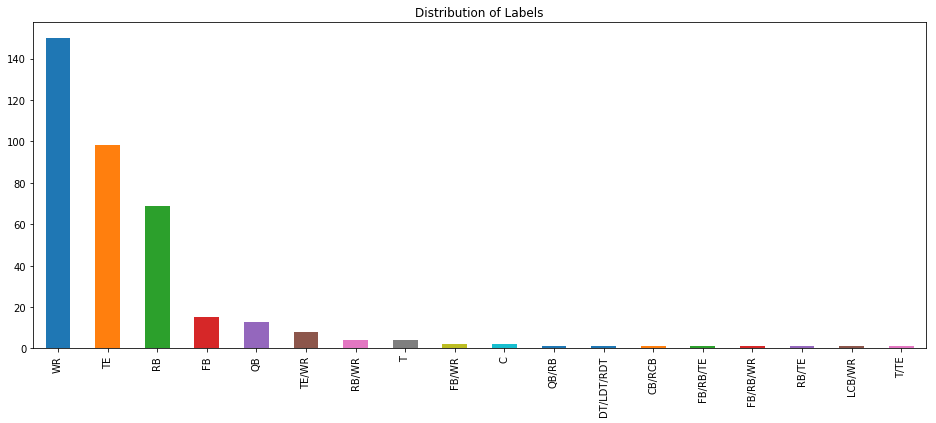

In [315]:
receiving_stats_2018['Pos'].value_counts().plot(kind = 'bar', figsize = (16, 6), title = 'Distribution of Labels');

Look at all those colors. Anyway, so what we're going to do in order to make this as faithful a calculation as possible is turn some of these awkward positions into normal position groups. This is referred to in Data Science as "reducing granularity". I went through by hand to ensure the accuracy of this dictionary, which can be viewed in the .py file. Sorry Tyrell Williams, you're just a receiver again.

In [316]:
receiving_stats_2018 = spf.position_map_receiving(receiving_stats_2018)
receiving_stats_2018[receiving_stats_2018['Pos'] == 'WR'].sort_values('Ctch%', ascending = False).reset_index(drop = True)

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,R/G,Y/G,Fmb
0,320,Cameron Meredith\MereCa00,NOR,26,WR,6,1,10,9,90.0%,114,12.7,1,46,1.5,19.0,1
1,321,Trey Quinn\QuinTr00,WAS,23,WR,3,2,10,9,90.0%,75,8.3,1,15,3.0,25.0,0
2,355,Kamar Aiken\AikeKa00,PHI,29,WR,5,1,7,6,85.7%,53,8.8,0,18,1.2,10.6,0
3,289,Eli Rogers\RogeEl00,PIT,26,WR,3,3,14,12,85.7%,79,6.6,0,17,4.0,26.3,1
4,11,Michael Thomas*+\ThomMi05,NOR,25,WR,16,16,147,125,85.0%,1405,11.2,9,72,7.8,87.8,2
5,74,Theo Riddick\RiddTh00,DET,27,WR,14,3,74,61,82.4%,384,6.3,0,20,4.4,27.4,0
6,145,Ryan Switzer\SwitRy00,PIT,24,WR,16,1,44,36,81.8%,253,7.0,1,24,2.3,15.8,2
7,84,Tyler Lockett\LockTy00,SEA,26,WR,16,14,70,57,81.4%,965,16.9,10,52,3.6,60.3,2
8,323,Taquan Mizzell\MizzTa00,CHI,25,WR,9,1,10,8,80.0%,78,9.8,1,26,0.9,8.7,0
9,377,Jacob Hollister\HollJa03,NWE,25,WR,8,1,5,4,80.0%,52,13.0,0,23,0.5,6.5,0


Now we want to normalize our values so that they match up with the ones we have in our original dataset from before. We'll also drop the values that we won't be using (including our player names, because we're only using these stats to find total trends by position), and we'll also clean up the Ctch% value again.

In [317]:
receiving_stats_2018 = spf.normalize_all_receiving(receiving_stats_2018)
receiving_stats_2018.head()

,Age,Pos,G,GS,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G,Catch Percentage
0,29,WR,16,16,10.625000,7.062500,14.8,104.8,0.500000,0.664706
1,26,WR,15,15,11.266667,7.400000,12.5,92.4,0.866667,0.656805
2,30,WR,15,15,11.200000,6.933333,12.5,86.5,1.000000,0.619048
3,22,WR,16,13,10.375000,6.937500,12.8,89.1,0.437500,0.668675
4,26,WR,16,16,10.187500,7.187500,13.7,98.3,0.687500,0.705521


#### Changing Statistics to Percentiles
We're almost at a point that we can extract values to compare to our players stats. What I'm going to do next is find what percentile for the league each player's statistic is in based on their position, by creating dictionaries (there's an example in the cell below) out of the overall receiving stats where the keys are positions and the values are lists of the values of the statistic.

In [318]:
tgt_per_game = receiving_stats_2018.groupby('Pos').apply(lambda x : x['Tgt/G'].tolist()).to_dict()
tgt_per_game

{'RB': [7.75,
  7.6875,
  7.5625,
  7.0,
  6.333333333333333,
  5.6875,
  5.0625,
  5.0625,
  5.785714285714286,
  5.571428571428571,
  4.75,
  4.5625,
  5.461538461538462,
  4.1875,
  5.5,
  3.875,
  3.9285714285714284,
  3.7857142857142856,
  4.454545454545454,
  4.0,
  3.1333333333333333,
  3.2857142857142856,
  2.75,
  2.8,
  2.5625,
  3.9,
  2.1875,
  3.1818181818181817,
  2.9166666666666665,
  2.5,
  2.2142857142857144,
  3.875,
  2.0714285714285716,
  1.8125,
  1.8125,
  2.1538461538461537,
  1.8666666666666667,
  2.25,
  1.6875,
  3.25,
  1.625,
  1.625,
  1.625,
  2.1666666666666665,
  1.5,
  1.7142857142857142,
  1.5,
  1.7692307692307692,
  3.8333333333333335,
  1.4666666666666666,
  2.1,
  1.6153846153846154,
  3.3333333333333335,
  2.5,
  1.4285714285714286,
  1.4615384615384615,
  1.7272727272727273,
  1.125,
  2.5714285714285716,
  1.0625,
  1.1428571428571428,
  2.5,
  0.9375,
  1.0833333333333333,
  0.9285714285714286,
  2.4,
  0.75,
  0.8461538461538461,
  1.25,
  0.6

We can now use these lists to find what percentile each of our players are for their relative receiving stats, and then use this information to determine their talent.

In [319]:
sf_players_percentiles = spf.receiving_percentiles(receiving_stats_2018, sf_players)
sf_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G Percentile,Catch Percentage Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile
0,RB,Alfred Morris,30.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,9.916667,0.166667,9.250000,3.855856,35.666667,10.810811,8.108108,9.459459,78.378378,16.216216,22.297297
1,RB,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN,30.0,13.0,10.200000,0.166667,8.600000,4.957364,42.633333,45.945946,32.432432,43.243243,78.378378,51.351351,61.486486
2,WR,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,2.333333,0.000000,0.083333,-2.000000,-0.166667,42.384106,36.754967,44.039735,94.701987,58.940397,81.456954
3,WR,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,3.222222,0.000000,0.296296,6.625000,1.962963,64.238411,15.231788,54.966887,94.039735,74.834437,52.649007
4,WR,Pierre Garcon,32.0,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,4.000000,0.000000,0.000000,NaN,0.000000,84.768212,26.490066,74.172185,43.708609,72.847682,17.549669
5,WR,Kendrick Bourne,23.0,203.0,6-1,East. Washington,NaN,27.0,8.0,2.148148,0.000000,0.000000,NaN,0.000000,41.059603,29.139073,41.059603,55.629139,41.059603,43.046358
6,TE,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,4.258065,0.000000,0.032258,10.000000,0.322581,94.339623,40.566038,94.339623,85.849057,97.169811,76.415094
7,RB,Carlos Hyde,27.0,229.0,6-0,Ohio St.,San Francisco 49ers / 2nd / 57th pick / 2014,16.0,16.0,18.687500,0.500000,15.000000,3.908333,58.625000,89.189189,18.918919,83.783784,9.459459,70.270270,22.297297


Now we'll do all of what we did for the receiving stats for the rushing stats.

In [320]:
rushing_stats_2018 = pd.read_csv('data/NFLRushingStats2018.csv', skiprows = [0])
rushing_stats_2018.head()

,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,1,Ezekiel Elliott*\ElliEz00,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,2,Saquon Barkley*\BarkSa00,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,3,David Johnson\JohnDa08,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,4,Todd Gurley*+\GurlTo01,LAR,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,5,Adrian Peterson\PeteAd01,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3


In [321]:
rushing_stats_2018 = rushing_stats_2018.dropna(subset = ['Pos'])
rushing_stats_2018['Pos'] = rushing_stats_2018.Pos.apply(lambda x : str(x).upper())

In [322]:
rushing_stats_2018 = spf.position_map_receiving(rushing_stats_2018)

In [323]:
rushing_stats_2018 = spf.normalize_all_rushing(rushing_stats_2018)

In [324]:
sf_players_percentiles = spf.rushing_percentiles(rushing_stats_2018, sf_players_percentiles)

In [325]:
rams_players_percentiles =  spf.receiving_percentiles(receiving_stats_2018, rams_players)
rams_players_percentiles = spf.rushing_percentiles(rushing_stats_2018, rams_players_percentiles)

We're going to get rid of our Touch/Game stats as well, because we didn't find anything in our league data to compare it against.

In [326]:
sf_players_percentiles = sf_players_percentiles.drop(['Touch/G'], axis = 1)
rams_players_percentiles = rams_players_percentiles.drop(['Touch/G'], axis = 1)

### Final Cuts of Players by 'Success'

And so after all of that preprocessing (oh don't worry there's more, we still have all our college and combine data after all) we've taken our skill position players for each team, found their statistics, and then put their statistics in terms of how they compare to other players at their position. We can now use this information to quantitatively measure whether or not a player is successful in these schemes, and then choose the players to select as our prototypes to compare against college players. Let's start with the Rams this time:

#### Rams Final Cuts

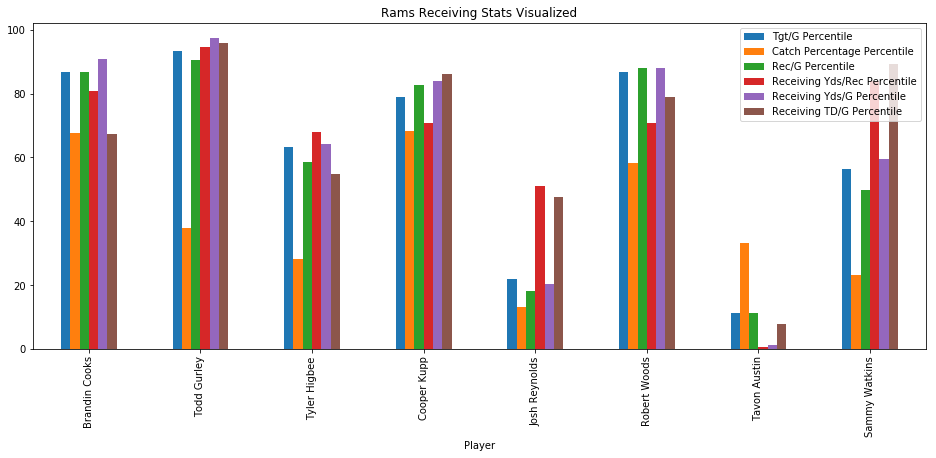

In [327]:
rams_players_percentiles.drop(['Age', 'Wt', 'G', 'GS', 'Rush Att/G Percentile', 'Rush TD/G Percentile', 'Rush Yds/Att Percentile', 'Rush Yds/G Percentile'], axis = 1).plot(x = 'Player', kind = 'bar', figsize = (16, 6), title = 'Rams Receiving Stats Visualized');

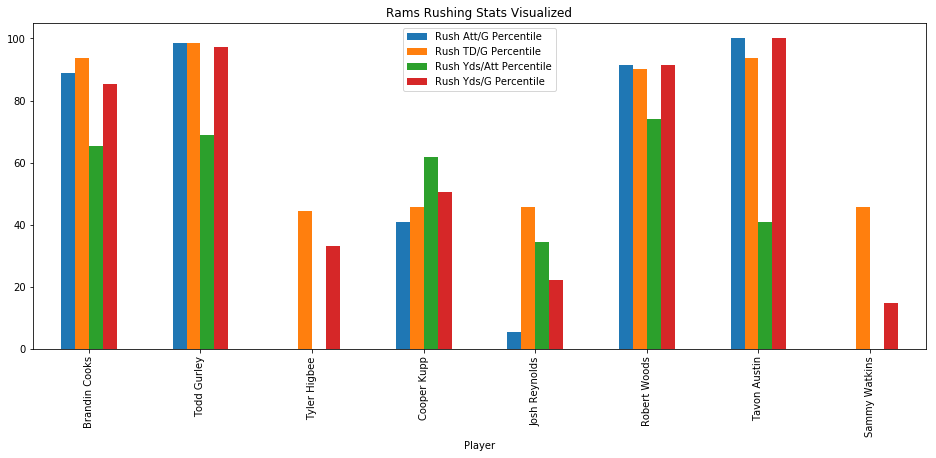

In [328]:
rams_players_percentiles.drop(['Age', 'Wt', 'G', 'GS', 'Catch Percentage Percentile', 'Tgt/G Percentile', 'Rec/G Percentile', 'Receiving Yds/Rec Percentile', 'Receiving Yds/G Percentile', 'Receiving TD/G Percentile'], axis = 1).plot(x = 'Player', kind = 'bar', figsize = (16, 6), title = 'Rams Rushing Stats Visualized');

In [329]:
rams_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Tgt/G Percentile,Catch Percentage Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile,Rush Att/G Percentile,Rush TD/G Percentile,Rush Yds/Att Percentile,Rush Yds/G Percentile
0,WR,Brandin Cooks,25.0,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014,16.0,16.0,86.754967,67.549669,86.754967,80.794702,90.728477,67.218543,88.888889,93.827160,65.432099,85.185185
1,RB,Todd Gurley,24.0,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015,29.0,29.0,93.243243,37.837838,90.540541,94.594595,97.297297,95.945946,98.648649,98.648649,68.918919,97.297297
2,TE,Tyler Higbee,25.0,255.0,6-6,Western Kentucky,Los Angeles Rams / 4th / 110th pick / 2016,32.0,32.0,63.207547,28.301887,58.490566,67.924528,64.150943,54.716981,0.000000,44.444444,NaN,33.333333
3,WR,Cooper Kupp,25.0,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017,23.0,14.0,78.807947,68.211921,82.781457,70.860927,84.105960,86.092715,40.740741,45.679012,61.728395,50.617284
4,WR,Josh Reynolds,23.0,196.0,6-3,Texas A&M,Los Angeles Rams / 4th / 117th pick / 2017,32.0,9.0,21.854305,13.245033,18.211921,50.993377,20.529801,47.682119,5.555556,45.679012,34.567901,22.222222
5,WR,Robert Woods,26.0,195.0,6-0,USC,Buffalo Bills / 2nd / 41st pick / 2013,28.0,27.0,86.754967,58.278146,88.079470,70.860927,88.079470,78.807947,91.358025,90.123457,74.074074,91.358025
6,WR,Tavon Austin,27.0,179.0,5-8,West Virginia,St. Louis Rams / 1st / 8th pick / 2013,16.0,9.0,11.258278,33.112583,11.258278,0.662252,1.324503,7.947020,100.000000,93.827160,40.740741,100.000000
7,WR,Sammy Watkins,24.0,211.0,6-1,Clemson,Buffalo Bills / 1st / 4th pick / 2014,15.0,14.0,56.291391,23.178808,49.668874,84.105960,59.602649,89.403974,0.000000,45.679012,NaN,14.814815


- `Brandin Cooks`: bordering on the verge of elite, Cooks is firmly in the realm of really, really good. Like really good. As a receiver, he's getting a lot of touches per game, while still 


- `Todd Gurley`: Gurley has earned his status as an Elite player in this league (maybe play him in the SuperBowl if you get the chance), as he ranks over the 90th percentile in receptions per game, yards per reception, receiving yards per game, receiving touchdowns per game, and rush yards per game amongst running backs, all while maintaining heavy usage, ranking above the 90th percentile in targets per game and rush attempts per game. He is certainly a player to use as a model for future picks at running back, regardless of scheme.


- `Tyler Higbee`: Higbee's statistics strike us as remarkably average, except in catch rate, where he's remarkably BELOW average. He has no statistics that lie above the 70th percentile for tight ends, and seems to not necessarily be just a mediocre tight end, at least in this offense.


- `Cooper Kupp`: certainly a good starter in this scheme, especially when only considering his receiving statistics (his rushing statistics are all below average, except for yards per attempt). Regardless, he still makes his mark on the offense, ranking near the 80th percentile in almost every major receiving category.


- `Josh Reynolds`: a disappointing surprise for me, as I expected his percentiles to be higher due to some pretty solid athleticism and opportunities. However, all but one of his statistics fall severely below the fiftieth percentile, with many lying in the twenties and teens.


- `Robert Woods`: somewhere between Kupp and Cooks (aka between good and really good), as while he isn't as consistent as Kupp in terms of percentiles across categories, he provides more of a running threat, and is more productive when he does catch the ball.


- `Tavon Austin`: When looking at Austin's Receiving stats, he is downright horrible, in almost the 0th percentile for yards per reception, and in the single digits for several other categories. His rushing stats, however, are more impressive: he had the most rushes and most rushing yards per game for receivers in this system. However, we expect these two stats to correlate: the more attempts you get, the more yards you should have. His yards per attempt, on the other hand, is fairly unimpressive, in the 40th percentile, and even though he had more rushing touchdowns than most receivers, receivers don't get many rushing touchdowns to begin with, so although Austin's rushing stats may look impressive, they're to be expected, and therefore he can be ruled out as a prototype.


- `Sammy Watkins`: Watkins is an interesting case. When I think about Watkins' career I think about someone who never lived up to the Buffalo Bills trading up to the 4th overall pick to pick him. However, looking at the stats, he was clearly a very good big play threat for the Rams: 84th percentile for yards per reception and 90th percentile for receiving touchdowns per game for receivers. And a big play threat will always have their place in an offense, so he makes the prototype list.

#### 49ers Final Cuts

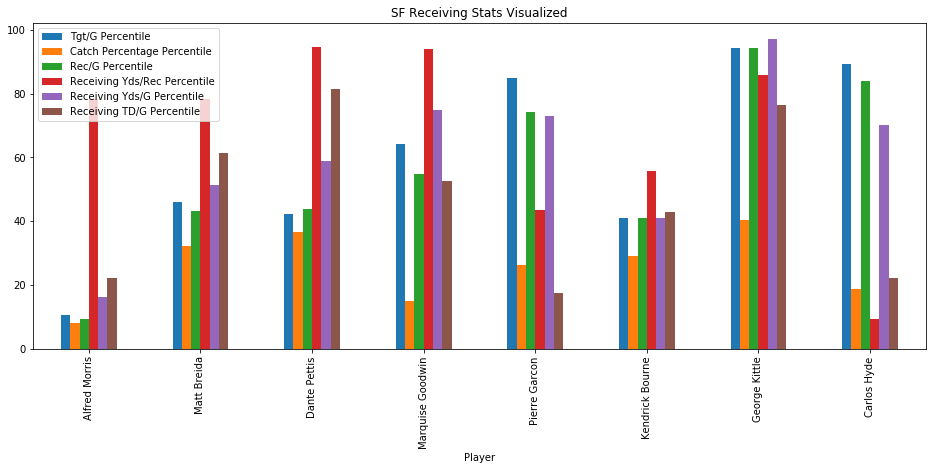

In [330]:
sf_players_percentiles.drop(['Age', 'Wt', 'G', 'GS', 'Rush Att/G Percentile', 'Rush TD/G Percentile', 'Rush Yds/Att Percentile', 'Rush Yds/G Percentile'], axis = 1).plot(x = 'Player', kind = 'bar', figsize = (16, 6), title = 'SF Receiving Stats Visualized');

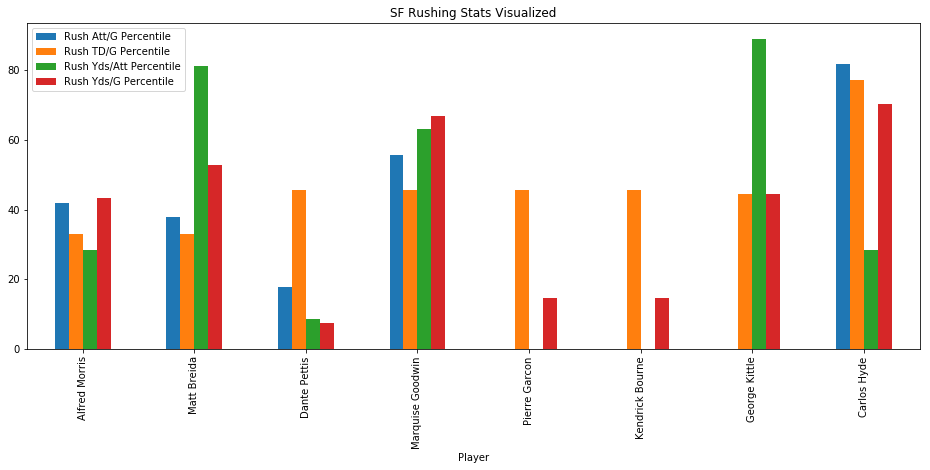

In [331]:
sf_players_percentiles.drop(['Age', 'Wt', 'G', 'GS', 'Catch Percentage Percentile', 'Tgt/G Percentile', 'Rec/G Percentile', 'Receiving Yds/Rec Percentile', 'Receiving Yds/G Percentile', 'Receiving TD/G Percentile'], axis = 1).plot(x = 'Player', kind = 'bar', figsize = (16, 6), title = 'SF Rushing Stats Visualized');

In [332]:
sf_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Tgt/G Percentile,Catch Percentage Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile,Rush Att/G Percentile,Rush TD/G Percentile,Rush Yds/Att Percentile,Rush Yds/G Percentile
0,RB,Alfred Morris,30.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,10.810811,8.108108,9.459459,78.378378,16.216216,22.297297,41.891892,33.108108,28.378378,43.243243
1,RB,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN,30.0,13.0,45.945946,32.432432,43.243243,78.378378,51.351351,61.486486,37.837838,33.108108,81.081081,52.702703
2,WR,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,42.384106,36.754967,44.039735,94.701987,58.940397,81.456954,17.901235,45.679012,8.641975,7.407407
3,WR,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,64.238411,15.231788,54.966887,94.039735,74.834437,52.649007,55.555556,45.679012,62.962963,66.666667
4,WR,Pierre Garcon,32.0,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,84.768212,26.490066,74.172185,43.708609,72.847682,17.549669,0.000000,45.679012,NaN,14.814815
5,WR,Kendrick Bourne,23.0,203.0,6-1,East. Washington,NaN,27.0,8.0,41.059603,29.139073,41.059603,55.629139,41.059603,43.046358,0.000000,45.679012,NaN,14.814815
6,TE,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,94.339623,40.566038,94.339623,85.849057,97.169811,76.415094,0.000000,44.444444,88.888889,44.444444
7,RB,Carlos Hyde,27.0,229.0,6-0,Ohio St.,San Francisco 49ers / 2nd / 57th pick / 2014,16.0,16.0,89.189189,18.918919,83.783784,9.459459,70.270270,22.297297,81.756757,77.027027,28.378378,70.270270


**A Preface**: the Niners provide a slight challenge, as one can attempt to make excuses for a lot of poor performances by pointing to the rotation at quarterback. However, while we should keep this in mind, it's important to still be critical of unimpressive statistics.

- `Alfred Morris`: he needed more analysis earlier, but now it's safe to say that he's just not very good, at least in this scheme. With a catch percentage lying in the abysmally low 8th percentile, there are almost no statistical positives to his game since coming to San Francisco, aside from yards per reception. He's still left searching for that magic he had in Washington all those years ago.


- `Matt Breida`: an UDFA, Breida has average to slightly below average stats, except in two categories, but those categories stand out to me, as they are yards per reception and yards per rushing attempt. These two statistics both hint to me that Breida has enough talent to make noise with more usage (he was below average in both targets and rushing attempts)


- `Dante Pettis`: A rookie out of Washington, Pettis intrigues me because, while his percentiles are all over the map, the two extraordinarily high percentiles he had were in yards per reception and receiving touchdowns per game, in the 95th and 80th percentiles, respectively. These two values are indicative of some serious big play ability, and if he can manage to get the other parts of his game up from the average state they are currently in, he has a lot of room for growth, especially as a rookie.


- `Marquise Goodwin`: While several of his stats are average, we do have to remember that there was severely inconsistent quarterback play, and he still had average to above average numbers in a lot of categories, with big play ability indicated by his incredibly high yards per reception numbers. He really needs to pick up his catch numbers though (15th percentile in catch percentage. Not EVERYTHING is on the quarterback when you've got the lowest catch rate on your team).


- `Pierre Garcón`: With very high usage numbers (84th percentile) comes the expectation of higher production. But this just didn't materialize for Garcón, as his catch percentage rate is the second lowest on the team, but without nearly any of the promising markers that Goodwin had.


- `Kendrick Bourne`: Just a Guy, slightly below average, nothing much special.


- `George Kittle`: Super. Star. Two words, all you need to know. High 90th percentile in every category, including in targets per game. Consistently dominant


- `Carlos Hyde`: A pretty successful rusher for the 49ers in this time period, having a lot of rushing attempts and good if not great yards and touchdowns per game numbers. His receiving wasn't great, as while he got a lot of targets and receptions, his yards per reception and catch percentage weren't great. I have decided he just barely misses the cut.

***

## Players to Use as Prototypes

Ultimately, we come to the conclusion that the players that are the most successful in this system are:

| Player | Position |
|---|---|
| Todd Gurley | RB |
| Brandin Cooks | WR |
| Cooper Kupp | WR |
| Robert Woods | WR |
| Sammy Watkins | WR |
| Matt Breida | RB |
| Dante Pettis | WR |
| Marquise Goodwin | WR |
| George Kittle | TE |


For those of you who skipped ahead, good decision, but let me at least explain how we got here so you're not left spinning around wondering where you are and what year it is. To be brief, we pretty much went through Rams and 49ers skill players, getting rid of those who didn't get much playing time, and then compared some of their statistics to those of others at their position in the league. We took those who compared favorably to their peers in a majority of categories or in categories that we felt indicated room for improvement (especially in a San Francisco offense stunted by poor Quarterback play).

Next, we will use these players to try and model which other players could be successful in this scheme. We foresee a few issues with having such a small training set and large set that we're aiming to predict on, however this will still be a worthwhile excercise if nothing else.

In [379]:
successful_players = ['George Kittle', 'Todd Gurley', 'Brandin Cooks', 'Cooper Kupp', 'Robert Woods', 'Sammy Watkins', 'Matt Breida', 'Dante Pettis', 'Marquise Goodwin']

In [338]:
nfl_receivers = pd.read_csv('data/NFLReceivingStats2018.csv')

In [354]:
nfl_receivers = nfl_receivers.dropna(subset = ['Pos']) #Gets rid of entries without a position
nfl_receivers['Pos'] = nfl_receivers.Pos.apply(lambda x : str(x).upper()) #Makes all the positions upper case
nfl_receivers = spf.position_map_receiving(nfl_receivers)
nfl_receivers = spf.clean_player_column(nfl_receivers)

In [427]:
training_receiving = nfl_receivers[nfl_receivers['Tm'].isin(['LAR', 'SFO'])]
training_receiving['Successful'] = training_receiving['Player'].isin(successful_players)
training_receiving.head()

/Users/thomasevans-barton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,R/G,Y/G,Fmb,Successful
14,15,George Kittle,SFO,25,TE,16,16,136,88,64.7%,1377,15.6,5,85,5.5,86.1,0,True
15,16,Robert Woods,LAR,26,WR,16,16,130,86,66.2%,1219,14.2,6,39,5.4,76.2,0,True
22,23,Brandin Cooks,LAR,25,WR,16,16,117,80,68.4%,1204,15.1,5,57,5.0,75.3,1,True
63,64,Todd Gurley,LAR,24,RB,14,14,81,59,72.8%,580,9.8,4,56,4.2,41.4,1,True
93,94,Kendrick Bourne,SFO,23,WR,16,8,66,42,63.6%,487,11.6,4,33,2.6,30.4,1,False


In [423]:
test_receiving = nfl_receivers.drop(training_receiving.index)

In [391]:
nfl_rushing = pd.read_csv('data/NFLRushingStats2018.csv', skiprows = [0])
nfl_rushing = spf.clean_player_column(nfl_rushing)
nfl_rushing = spf.position_map_rushing(nfl_rushing)
training_rushing = nfl_rushing[nfl_rushing['Tm'].isin(['SFO', 'LAR'])]
training_rushing['Successful'] = training_rushing['Player'].isin(successful_players)
training_rushing.head()

/Users/thomasevans-barton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,Successful
3,4,Todd Gurley,LAR,24,RB,14,14,256,1251,17,36,4.9,89.4,1,True
27,28,Matt Breida,SFO,23,RB,14,13,153,814,3,66,5.3,58.1,1,True
133,134,Robert Woods,LAR,26,WR,16,16,19,157,1,56,8.3,9.8,0,True
153,154,Brandin Cooks,LAR,25,WR,16,16,10,68,1,17,6.8,4.3,1,True
211,212,Marquise Goodwin,SFO,28,WR,11,8,4,9,0,5,2.3,0.8,1,True


In [428]:
test_rushing = nfl_rushing.drop(training_rushing.index)

In [396]:
rec_log_model = LogisticRegression()

In [420]:
X_rec_train = np.array([training_receiving['Tgt'], training_receiving['Rec'], training_receiving['Y/G'], training_receiving['TD']]).T
y_rec_train = np.array(training_receiving['Successful'])

In [422]:
rec_log_model.fit(X_rec_train, y_rec_train)

/Users/thomasevans-barton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [429]:
X_test_rec = np.array([test_receiving['Tgt'], test_receiving['Rec'], test_receiving['Y/G'], test_receiving['TD']]).T
test_receiving['Logistic Prediction of Success'] = rec_log_model.predict(X_test_rec)
test_receiving.head()

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,R/G,Y/G,Fmb,Logistic Prediction of Success
0,1,Julio Jones,ATL,29,WR,16,16,170,113,66.5%,1677,14.8,8,58,7.1,104.8,2,True
1,2,Davante Adams,GNB,26,WR,15,15,169,111,65.7%,1386,12.5,13,57,7.4,92.4,0,True
2,3,Antonio Brown,PIT,30,WR,15,15,168,104,61.9%,1297,12.5,15,78,6.9,86.5,0,True
3,4,JuJu Smith-Schuster,PIT,22,WR,16,13,166,111,66.9%,1426,12.8,7,97,6.9,89.1,1,True
4,5,DeAndre Hopkins,HOU,26,WR,16,16,163,115,70.6%,1572,13.7,11,49,7.2,98.3,2,True


In [430]:
rush_log_model = LogisticRegression()

In [432]:
X_rush_train = np.array([training_rushing['Y/A'], training_rushing['Y/G'], training_rushing['TD']]).T
y_rush_train = np.array(training_rushing['Successful'])

In [433]:
rush_log_model.fit(X_rush_train, y_rush_train)

/Users/thomasevans-barton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [437]:
X_test_rush = np.array([test_rushing['Y/A'], test_rushing['Y/G'], test_rushing['TD']]).T
test_rushing['Logistic Prediction of Success'] = rush_log_model.predict(X_test_rush)
test_rushing.head()

,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,Logistic Prediction of Success
0,1,Ezekiel Elliott,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6,True
1,2,Saquon Barkley,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0,True
2,3,David Johnson,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3,True
4,5,Adrian Peterson,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3,True
5,6,Jordan Howard,CHI,24,RB,16,15,250,935,9,42,3.7,58.4,2,True


In [439]:
rec_svm_model = svm.SVC()

In [440]:
rec_svm_model.fit(X_rec_train, y_rec_train)

/Users/thomasevans-barton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [442]:
test_receiving['SVM Prediction of Success'] = rec_svm_model.predict(X_test_rec)
test_receiving

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,R/G,Y/G,Fmb,Logistic Prediction of Success,SVM Prediction of Success
0,1,Julio Jones,ATL,29,WR,16,16,170,113,66.5%,1677,14.8,8,58,7.1,104.8,2,True,True
1,2,Davante Adams,GNB,26,WR,15,15,169,111,65.7%,1386,12.5,13,57,7.4,92.4,0,True,True
2,3,Antonio Brown,PIT,30,WR,15,15,168,104,61.9%,1297,12.5,15,78,6.9,86.5,0,True,True
3,4,JuJu Smith-Schuster,PIT,22,WR,16,13,166,111,66.9%,1426,12.8,7,97,6.9,89.1,1,True,True
4,5,DeAndre Hopkins,HOU,26,WR,16,16,163,115,70.6%,1572,13.7,11,49,7.2,98.3,2,True,True
5,6,Zach Ertz,PHI,28,TE,16,16,156,116,74.4%,1163,10.0,8,34,7.3,72.7,1,True,True
6,7,Adam Thielen,MIN,28,WR,16,16,153,113,73.9%,1373,12.2,9,68,7.1,85.8,1,True,True
7,8,Travis Kelce,KAN,29,TE,16,16,150,103,68.7%,1336,13.0,10,43,6.4,83.5,2,True,True
8,9,Stefon Diggs,MIN,25,WR,15,14,149,102,68.5%,1021,10.0,9,75,6.8,68.1,0,True,True
9,10,Jarvis Landry,CLE,26,WR,16,14,149,81,54.4%,976,12.0,4,51,5.1,61.0,1,False,True


In [443]:
rush_svm_model = svm.SVC()

In [444]:
rush_svm_model.fit(X_rush_train, y_rush_train)

/Users/thomasevans-barton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [447]:
test_rushing['SVM Prediction of Success'] = rush_svm_model.predict(X_test_rush)
test_rushing

,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,Logistic Prediction of Success,SVM Prediction of Success
0,1,Ezekiel Elliott,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6,True,True
1,2,Saquon Barkley,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0,True,True
2,3,David Johnson,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3,True,True
4,5,Adrian Peterson,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3,True,True
5,6,Jordan Howard,CHI,24,RB,16,15,250,935,9,42,3.7,58.4,2,True,True
6,7,Chris Carson,SEA,24,RB,14,14,247,1151,9,61,4.7,82.2,3,True,True
7,8,Joe Mixon,CIN,22,RB,14,13,237,1168,8,51,4.9,83.4,0,True,True
8,9,Peyton Barber,TAM,24,RB,16,16,234,871,5,28,3.7,54.4,1,True,True
9,10,Christian McCaffrey,CAR,22,RB,16,16,219,1098,7,59,5.0,68.6,4,True,True
10,11,James Conner,PIT,23,RB,13,12,215,973,12,30,4.5,74.8,4,True,True
